# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

#### Codebook:

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per $10,000.

**ptratio** 
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in $1000s.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

boston = pd.read_csv('../data/boston_data.csv')

In [2]:
print(boston.shape)
print(boston.dtypes)
boston.head()

(404, 14)
crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


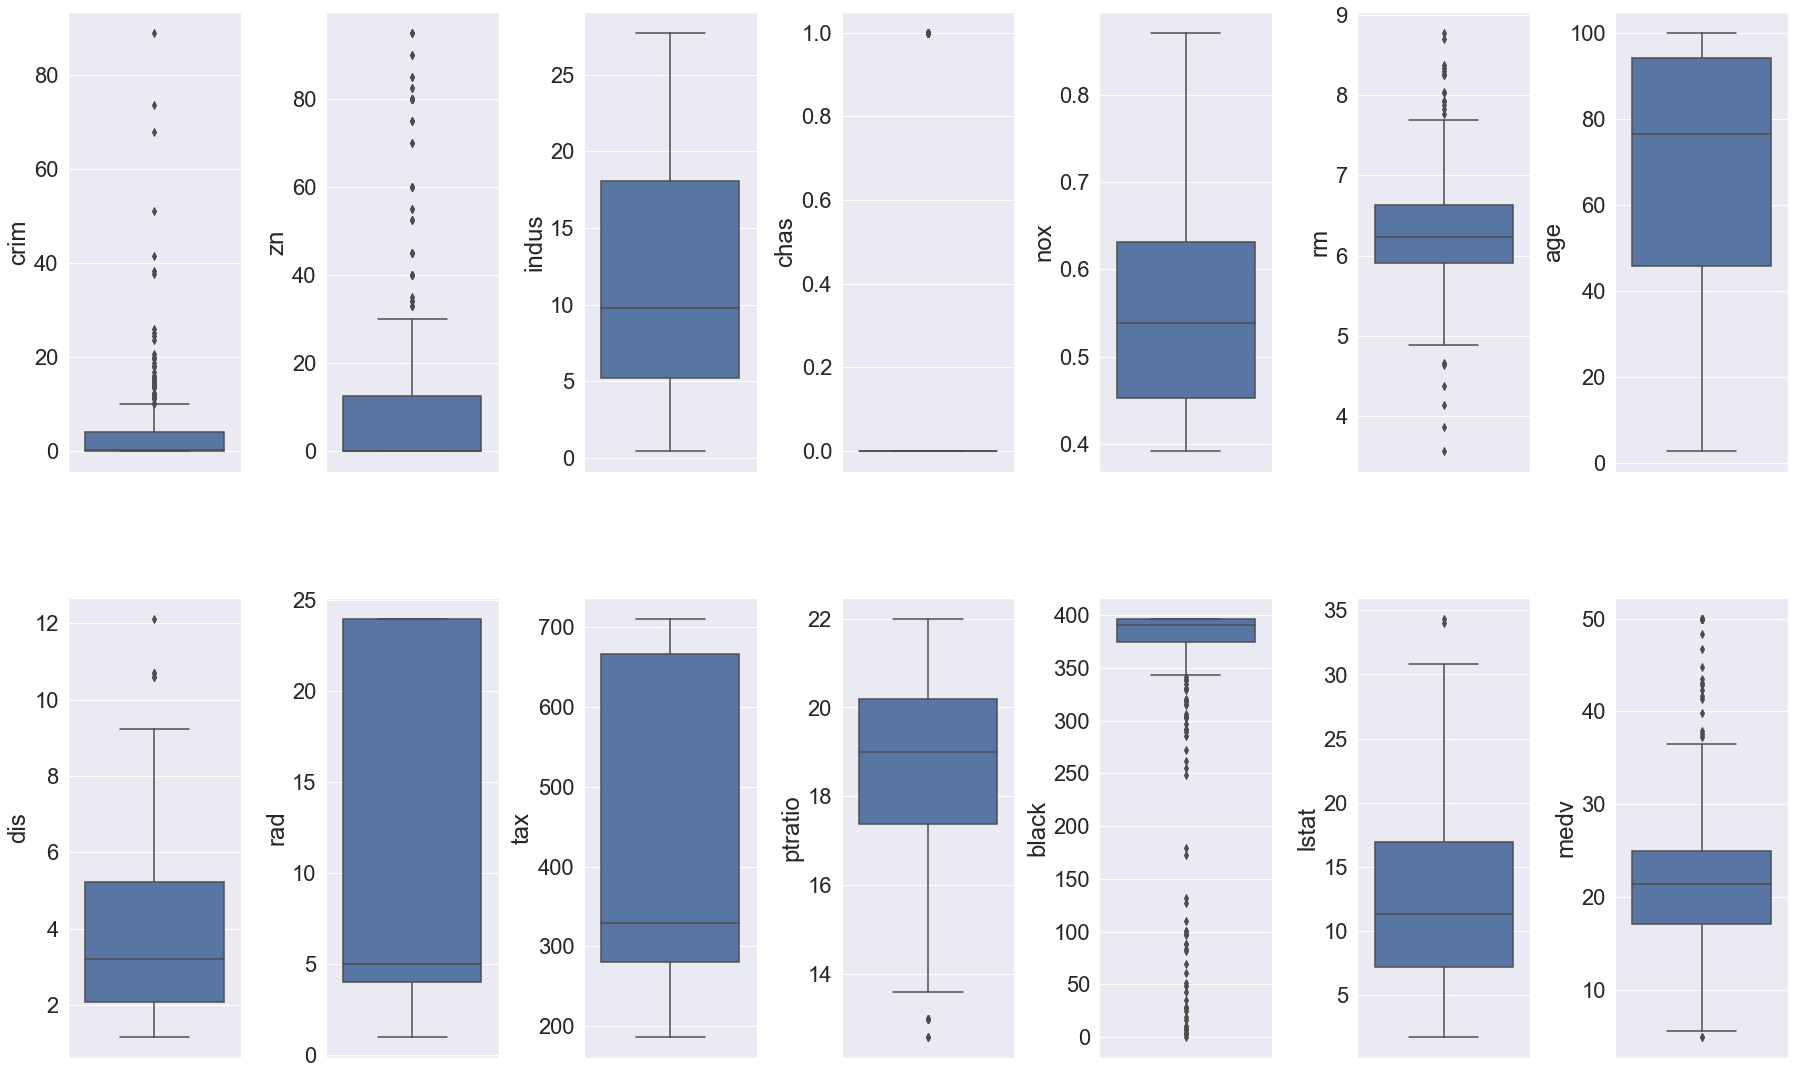

In [4]:
# categorical columns are: rad and chas (dummy variables)
import seaborn as sns

#plt.rcParams["axes.labelsize"] = 30
sns.set(font_scale = 2)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(25, 15))
index = 0
axs = axs.flatten()
for col,data in boston.items():
    sns.boxplot(y=col, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [5]:
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1

outliers = ((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR))).sum()
outliers

outlier_perc =  outliers * 100.0 / np.shape(boston)[0]
outlier_perc

crim       10.396040
zn         12.128713
indus       0.000000
chas        6.930693
nox         0.000000
rm          5.198020
age         0.000000
dis         1.237624
rad         0.000000
tax         0.000000
ptratio     2.970297
black      15.099010
lstat       0.495050
medv        6.683168
dtype: float64

In [6]:
# Scaling is definitely needed. First checking null values:
null_col = boston.isna().sum()
null_col

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

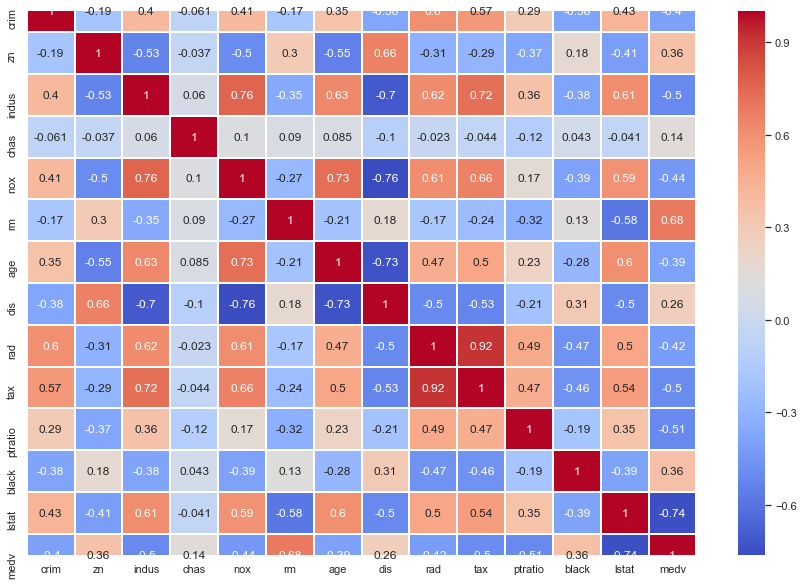

In [7]:
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(boston.corr(), annot=True, fmt='.2g',cmap= 'coolwarm',linewidths=1)

In [8]:
#rad and tax are very strong positive correlation. rad is an index of accessibility to radial highways (categorical)
# I would keep tax rather than rad

boston.drop(['rad'], axis=1, inplace=True)

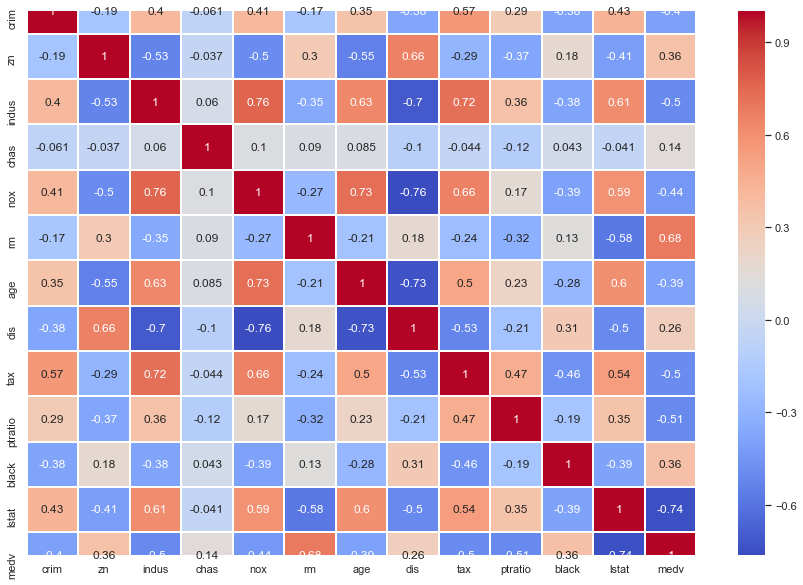

In [9]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(boston.corr(), annot=True, fmt='.2g',cmap= 'coolwarm',linewidths=1)

In [10]:
# high correlations with medv: lstat (neg), ptratio(neg), tax(neg), rm (pos), indus(neg), 
# med (between 0.4- 0.5) correlation with medv: crim(neg), nox(neg)
# let's scale and plot these against medv
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.MinMaxScaler()

filter_boston = boston[['lstat','ptratio','tax','rm','indus','crim','nox']]
boston_scaled = pd.DataFrame(scaler.fit_transform(filter_boston.values),columns=filter_boston.columns, index=filter_boston.index)

boston_scaled.head()

,lstat,ptratio,tax,rm,indus,crim,nox
0,0.249694,0.702128,0.225191,0.459858,0.379399,0.001713,0.043841
1,0.229473,0.755319,0.185115,0.453344,0.171188,0.001090,0.127349
2,0.252451,0.617021,0.223282,0.461966,0.346041,0.003856,0.317328
3,0.604167,0.223404,0.412214,0.390113,0.700880,0.030658,1.000000
4,0.235907,0.446809,0.106870,0.489366,0.189883,0.000416,0.098121


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

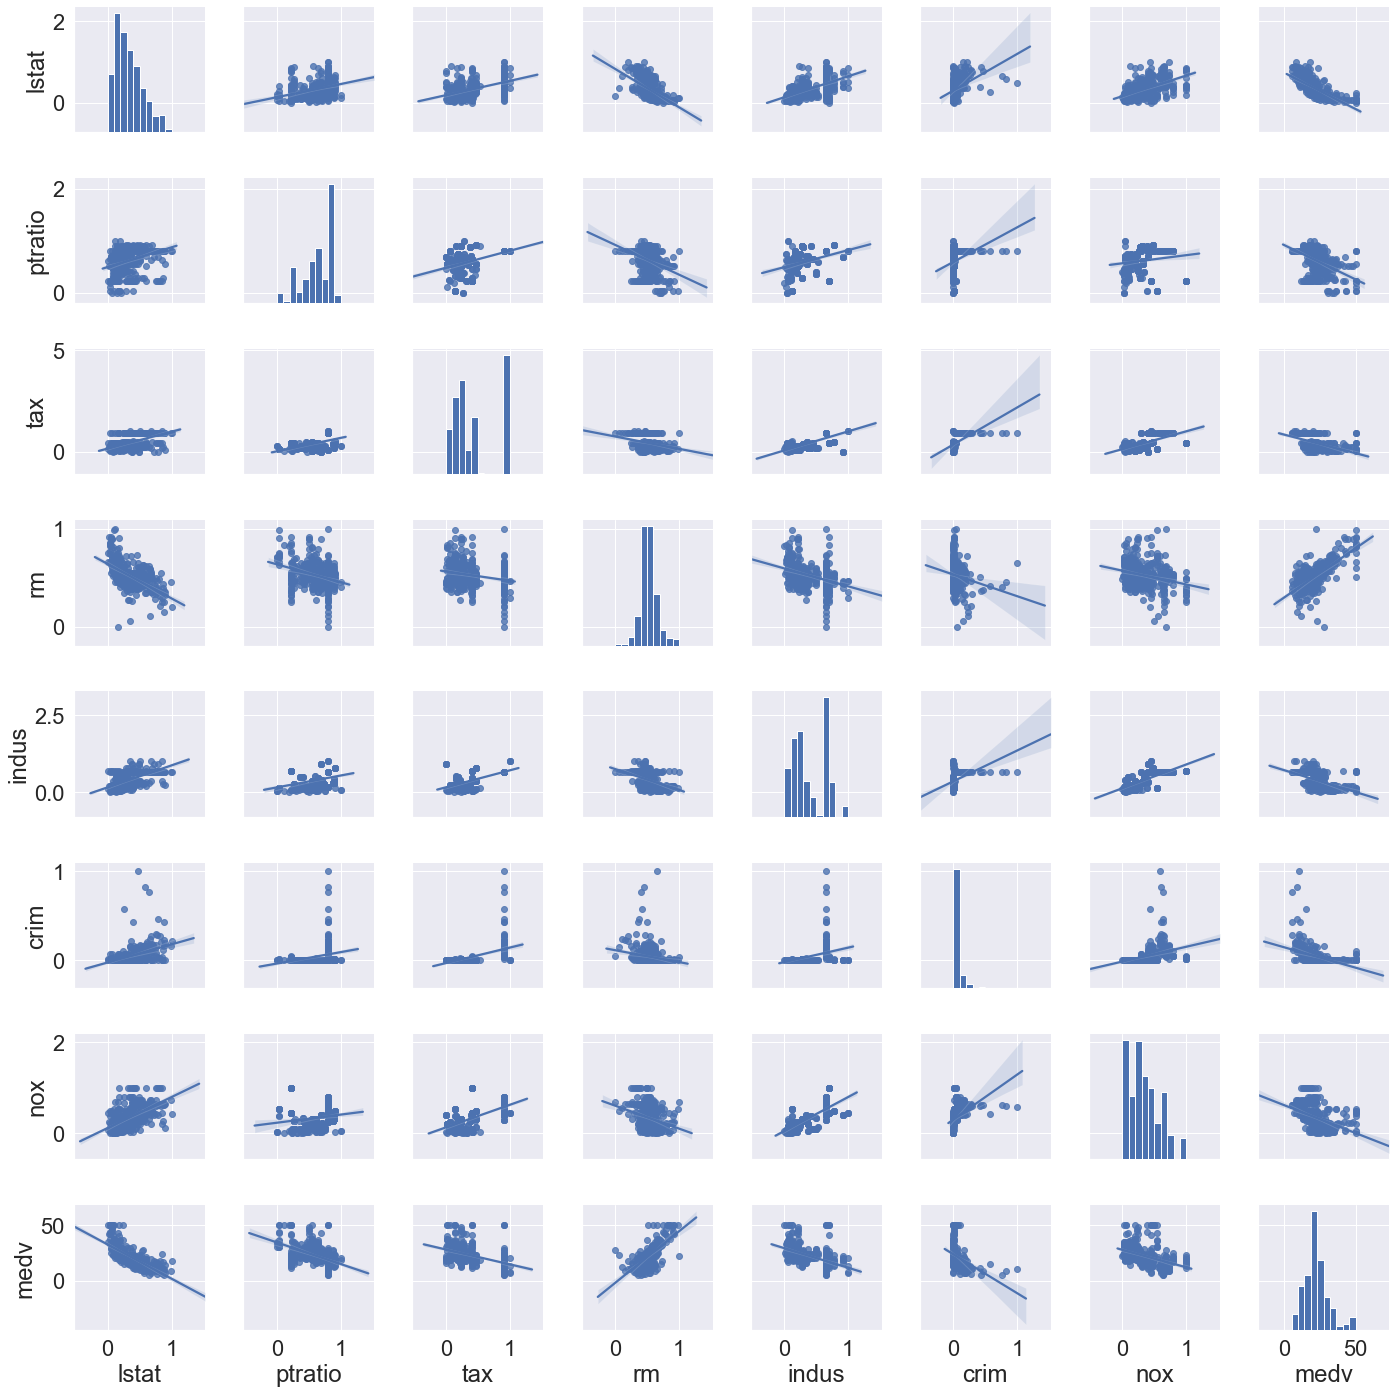

In [11]:
sns.set(font_scale = 2)
boston_corr = pd.concat([boston_scaled, boston['medv']], axis=1)
boston_corr
sns.pairplot(boston_corr, kind='reg')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [12]:
# Your response here
# lstat, ptratio rm seem most interesting    

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

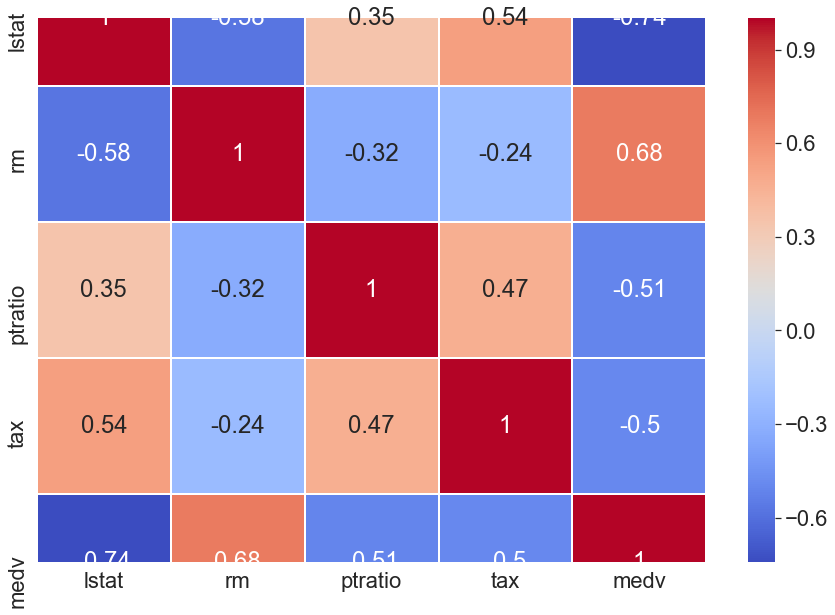

In [13]:
# Your response here
boston_clean_scaled = boston_corr[['lstat', 'rm','ptratio', 'tax','medv']]
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(boston_clean_scaled.corr(), annot=True, fmt='.2g',cmap= 'coolwarm',linewidths=1)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [14]:
# Your code here
boston_clean_scaled.describe()

,lstat,rm,ptratio,tax,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.332994,0.525091,0.621761,0.428794,22.312376
std,0.212168,0.129494,0.228755,0.326476,8.837019
min,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.165594,0.448697,0.507979,0.179389,17.100000
50%,0.292126,0.511496,0.680851,0.272901,21.400000
75%,0.465074,0.587900,0.808511,0.914122,25.000000
max,1.000000,1.000000,1.000000,1.000000,50.000000


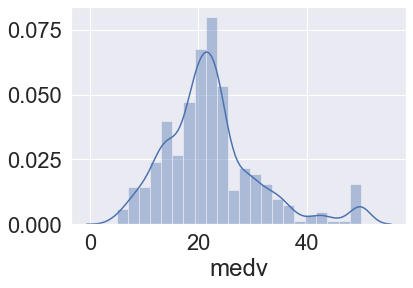

In [15]:
sns.distplot(boston['medv'])

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [16]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [17]:
# Your code here
from sklearn.model_selection import train_test_split

data = boston_clean_scaled[boston_clean_scaled.columns[boston_clean_scaled.columns!='medv']]
target = boston_clean_scaled[['medv']].values
target = target.ravel()

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, shuffle=True)

In [18]:
print(y_train.shape)


(323,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [19]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

depths = [2, 4, 6, 8, 10]
train_result = []
test_result = []

for i, depth in enumerate(depths):
    RFR = RandomForestRegressor(n_estimators=10, max_depth = depth)
    RFR.fit(X_train, y_train)
    train_pred = RFR.predict(X_train)
    score_train = r2_score(y_train, train_pred)
    train_result.append(score_train)
    
    y_pred = RFR.predict(X_test)
    score_test = r2_score(y_test, y_pred)
    test_result.append(score_test)

Now, plot the score for each tree on the training set and on the testing set.

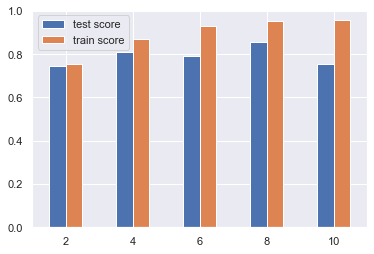

In [25]:
# Produce a plot with the score for the testing and training for the different max depths
sns.set(font_scale = 1)
plot_df = pd.DataFrame({'test score': test_result,
                   'train score': train_result}, index=depths)
ax = plot_df.plot.bar(rot=0)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [21]:
# Your response here
# Success of test score fluctuates after depth=4, while train score increases. 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [22]:
# Your response here
# At depth=1, both train and test scores are similar and pretty low, the model is underfitted (high bias)
# at depth=10, the model is overfitted (too much noise). The test score actually goes down, but it's able to predict the training data very well. It's overfitted.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [29]:
RFR_4 = RandomForestRegressor(n_estimators=10, max_depth = 4)
RFR_4.fit(X_train, y_train)
train_pred_4 = RFR_4.predict(X_train)
score_train_4 = r2_score(y_train, train_pred_4)   
y_pred_4 = RFR_4.predict(X_test)
score_test_4 = r2_score(y_test, y_pred_4)
print(score_test_4)

RFR_6 = RandomForestRegressor(n_estimators=10, max_depth = 6)
RFR_6.fit(X_train, y_train)
train_pred_6 = RFR_6.predict(X_train)
score_train_6 = r2_score(y_train, train_pred_6)   
y_pred_6 = RFR_6.predict(X_test)
score_test_6 = r2_score(y_test, y_pred_6)
print(score_test_6)

RFR_8 = RandomForestRegressor(n_estimators=10, max_depth = 8)
RFR_8.fit(X_train, y_train)
train_pred_8 = RFR_8.predict(X_train)
score_train_8 = r2_score(y_train, train_pred_8)   
y_pred_8 = RFR_8.predict(X_test)
score_test_8 = r2_score(y_test, y_pred_8)
print(score_test_8)

# depth 4 is best

0.8461121139015453
0.8423158964949399
0.840172786580887


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [24]:
# Your response here